In [1]:
#import libraries and csv file
import csv
import pandas
from scipy import stats
from matplotlib import pyplot as plt


df = pandas.read_csv('/content/survey on mood!.csv')

In [2]:
#drop timestamp column
df = df.drop('Timestamp', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [3]:
#remove reflection questions
reflection_questons = list(df.columns[20:24])
df = df.drop(reflection_questons, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
#split into before and after groups
df_before = df.iloc[:,0:20]
df_after = df.iloc[:,20:41]

In [5]:
#flip reverse qn scoring for before scores
df_before.iloc[:,[13, 16, 17]] = 6 - df_before.iloc[:,[13,16,17]]

#remove distractors for before scores
df_before = df_before.drop(df_before.iloc[:,[1,3,4,6,8,10,12,14,18,19]], axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [6]:
#flip reverse qn scoring for after scores
df_after.iloc[:,[10, 15, 19]] = 6- df_after.iloc[:,[10, 15, 19]]

#remove distractors for after scores
df_after = df_after.drop(df_after.iloc[:,[1,3,5,7,9,11,13,14,16,18,20]],axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [7]:
df_before = df_before.transpose()

df_after = df_after.transpose()

In [8]:
df_before_sums = df_before.sum()
df_before_sums.describe()
df_before_sums = pandas.DataFrame(df_before_sums)

In [9]:
df_after_sums = df_after.sum()
df_after_sums.describe()
df_after_sums = pandas.DataFrame(df_after_sums)

In [10]:
stats.shapiro(df_before_sums)

(0.9750100374221802, 0.11854379624128342)

In [11]:
stats.shapiro(df_after_sums)

(0.9855843186378479, 0.5092361569404602)

In [12]:
stats.ttest_rel(df_before_sums, df_after_sums)

Ttest_relResult(statistic=array([-4.99521113]), pvalue=array([3.44639148e-06]))

In [13]:
stats.ttest_rel(df_before_sums, df_after_sums)

Ttest_relResult(statistic=array([-4.99521113]), pvalue=array([3.44639148e-06]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f43334380d0>]],
      dtype=object)

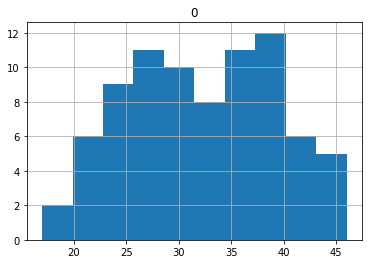

In [14]:
df_before_sums.hist()

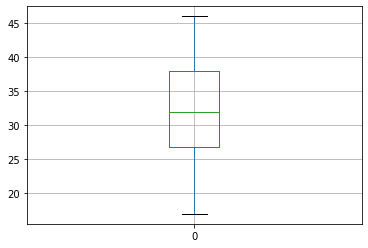

In [15]:
df_before_sums.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4332ed91d0>]],
      dtype=object)

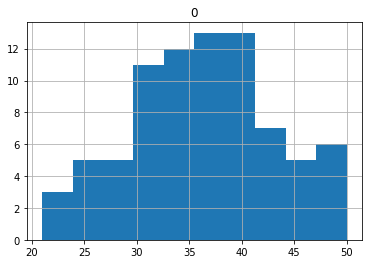

In [16]:
df_after_sums.hist()

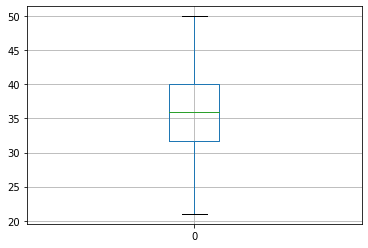

In [17]:
df_after_sums.boxplot()

In [23]:
#TEST CODE BOX
df_before_sums.to_csv("before.csv")
df_after_sums.to_csv("after.csv")

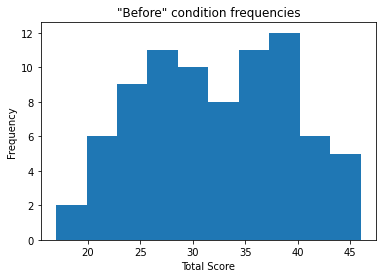

In [19]:
plt.hist(df_before.sum())
plt.ylabel('Frequency')
plt.xlabel('Total Score')
plt.title('"Before" condition frequencies')
plt.savefig('before_hist.png')
plt.show()

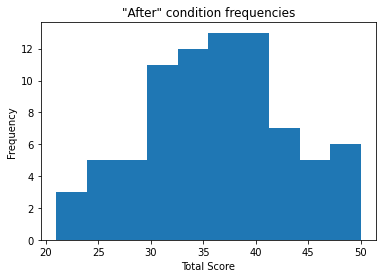

In [20]:
plt.hist(df_after.sum())
plt.ylabel('Frequency')
plt.xlabel('Total Score')
plt.title('"After" condition frequencies')
plt.savefig('after_hist.png')
plt.show()

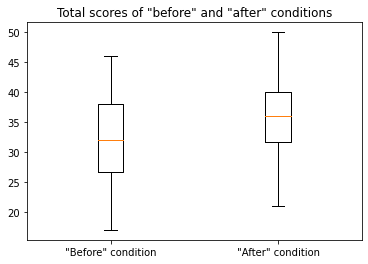

In [21]:
fig, ax = plt.subplots()
ax.boxplot([df_before.sum(), df_after.sum()], labels=['"Before" condition', '"After" condition'])
plt.title('Total scores of "before" and "after" conditions')
plt.savefig('box_plot.png')
plt.show()